In [9]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 74.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology
import scipy.ndimage as ndi

In [11]:
#image_stack = skimage.io.imread('images/46658_784_B12_1.tif')
image_stack = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/46658_784_B12_1.tif')

image_nuclei = image_stack[:,:,2]#blue channel in RGB
image_signal = image_stack[:,:,1]#green channel in RGB

# filter image
image_nuclei = skimage.filters.median(image_nuclei, skimage.morphology.disk(5))

# create mask and clean-up
mask_nuclei = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)
mask_nuclei = skimage.morphology.binary_closing(mask_nuclei, footprint=skimage.morphology.disk(5))
mask_nuclei = ndi.binary_fill_holes(mask_nuclei, skimage.morphology.disk(5))

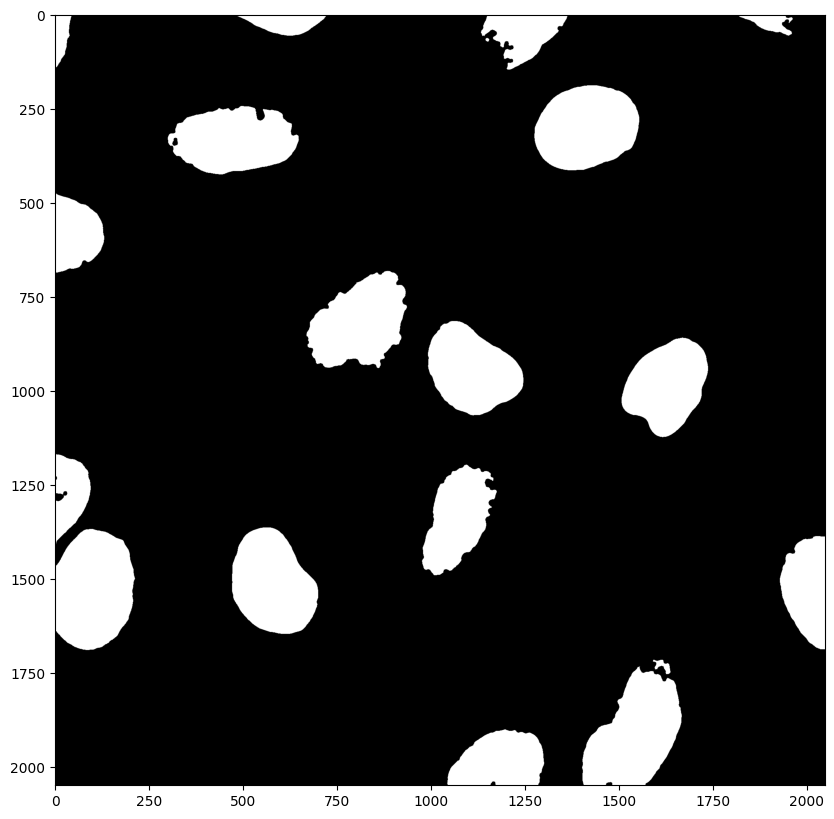

In [12]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_nuclei, cmap = 'gray');

In [13]:
my_labels = skimage.morphology.label(mask_nuclei)

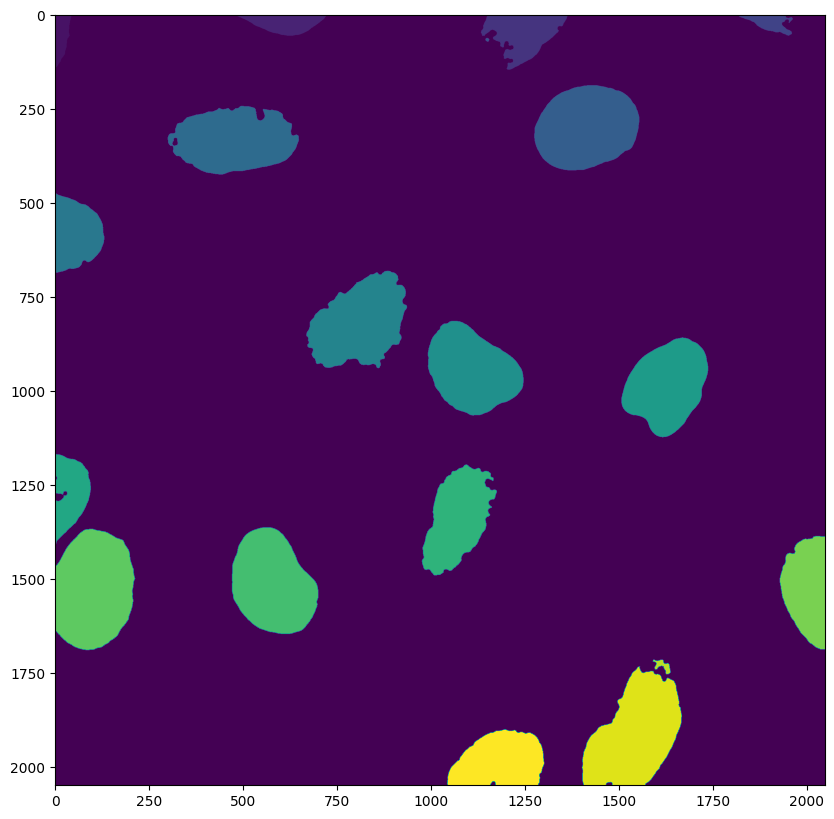

In [15]:
plt.subplots(figsize=(10, 10))
plt.imshow(my_labels);

In [16]:
my_regions = skimage.measure.regionprops_table(my_labels, properties=('label', 'area'))

In [17]:
my_regions

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 'area': array([4.2210e+03, 8.3860e+03, 1.8258e+04, 4.0430e+03, 7.3000e+01,
        4.9056e+04, 4.5671e+04, 2.0537e+04, 4.6853e+04, 4.3277e+04,
        4.0768e+04, 1.5090e+04, 3.5404e+04, 4.7642e+04, 5.4978e+04,
        2.6774e+04, 4.0000e+00, 8.1200e+02, 5.4298e+04, 2.9638e+04])}

In [18]:
my_dict = {'fruit name': 'apple', 'weigth': 50, 'types': ['golden', 'gala', 'breaburn']}
my_dict

{'fruit name': 'apple', 'weigth': 50, 'types': ['golden', 'gala', 'breaburn']}

In [19]:
my_dict['weigth']

50

In [20]:
my_regions = skimage.measure.regionprops_table(
    my_labels,intensity_image=image_signal, properties=('label','area','mean_intensity'))

In [21]:
my_regions

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 'area': array([4.2210e+03, 8.3860e+03, 1.8258e+04, 4.0430e+03, 7.3000e+01,
        4.9056e+04, 4.5671e+04, 2.0537e+04, 4.6853e+04, 4.3277e+04,
        4.0768e+04, 1.5090e+04, 3.5404e+04, 4.7642e+04, 5.4978e+04,
        2.6774e+04, 4.0000e+00, 8.1200e+02, 5.4298e+04, 2.9638e+04]),
 'mean_intensity': array([ 79.26510306,  65.99773432,  70.26109103,  63.02671284,
         47.43835616,  53.71450995,  53.8070986 ,  70.45391245,
         66.13772864,  41.4125517 ,  58.67503925,  44.19814447,
         74.77155124,  41.70190168,  35.9041071 ,  53.07787406,
        112.        , 102.9864532 ,  56.11020664,  66.28379108])}

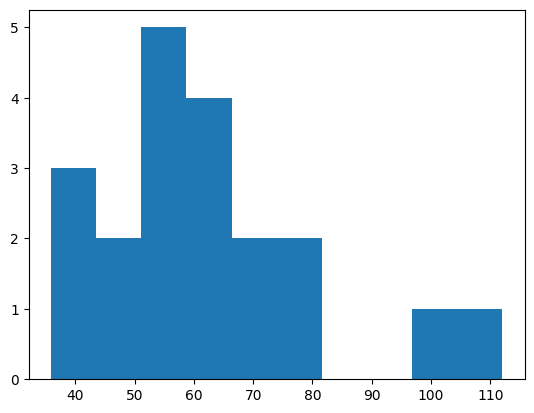

In [22]:
plt.hist(my_regions['mean_intensity']);

In [27]:
my_regions['area']

array([4.2210e+03, 8.3860e+03, 1.8258e+04, 4.0430e+03, 7.3000e+01,
       4.9056e+04, 4.5671e+04, 2.0537e+04, 4.6853e+04, 4.3277e+04,
       4.0768e+04, 1.5090e+04, 3.5404e+04, 4.7642e+04, 5.4978e+04,
       2.6774e+04, 4.0000e+00, 8.1200e+02, 5.4298e+04, 2.9638e+04])

In [28]:
selected = my_regions['area'] > 100
selected

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True])

In [29]:
my_regions['mean_intensity'][selected]

array([ 79.26510306,  65.99773432,  70.26109103,  63.02671284,
        53.71450995,  53.8070986 ,  70.45391245,  66.13772864,
        41.4125517 ,  58.67503925,  44.19814447,  74.77155124,
        41.70190168,  35.9041071 ,  53.07787406, 102.9864532 ,
        56.11020664,  66.28379108])

In [30]:
import pandas as pd

In [31]:
np.random.seed(42)
my_array = np.random.randint(0, 100, (3, 5))
my_array

array([[51, 92, 14, 71, 60],
       [20, 82, 86, 74, 74],
       [87, 99, 23,  2, 21]])

In [32]:
pd.DataFrame(my_array)

,0,1,2,3,4
0,51,92,14,71,60
1,20,82,86,74,74
2,87,99,23,2,21


In [33]:
my_df = pd.DataFrame(my_array, columns=['a', 'b', 'c', 'd', 'e'])
my_df

,a,b,c,d,e
0,51,92,14,71,60
1,20,82,86,74,74
2,87,99,23,2,21


In [34]:
my_df['c']

0    14
1    86
2    23
Name: c, dtype: int64

In [35]:
my_df['c'] < 50

0     True
1    False
2     True
Name: c, dtype: bool

In [36]:
my_df[my_df['c'] < 50]

,a,b,c,d,e
0,51,92,14,71,60
2,87,99,23,2,21


In [37]:
my_regions

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 'area': array([4.2210e+03, 8.3860e+03, 1.8258e+04, 4.0430e+03, 7.3000e+01,
        4.9056e+04, 4.5671e+04, 2.0537e+04, 4.6853e+04, 4.3277e+04,
        4.0768e+04, 1.5090e+04, 3.5404e+04, 4.7642e+04, 5.4978e+04,
        2.6774e+04, 4.0000e+00, 8.1200e+02, 5.4298e+04, 2.9638e+04]),
 'mean_intensity': array([ 79.26510306,  65.99773432,  70.26109103,  63.02671284,
         47.43835616,  53.71450995,  53.8070986 ,  70.45391245,
         66.13772864,  41.4125517 ,  58.67503925,  44.19814447,
         74.77155124,  41.70190168,  35.9041071 ,  53.07787406,
        112.        , 102.9864532 ,  56.11020664,  66.28379108])}

In [38]:
my_regions_df = pd.DataFrame(my_regions)
my_regions_df

,label,area,mean_intensity
0,1,4221.0,79.265103
1,2,8386.0,65.997734
2,3,18258.0,70.261091
3,4,4043.0,63.026713
4,5,73.0,47.438356
5,6,49056.0,53.714510
6,7,45671.0,53.807099
7,8,20537.0,70.453912
8,9,46853.0,66.137729
9,10,43277.0,41.412552


In [39]:
my_regions_df[my_regions_df['area'] > 100]

,label,area,mean_intensity
0,1,4221.0,79.265103
1,2,8386.0,65.997734
2,3,18258.0,70.261091
3,4,4043.0,63.026713
5,6,49056.0,53.714510
6,7,45671.0,53.807099
7,8,20537.0,70.453912
8,9,46853.0,66.137729
9,10,43277.0,41.412552
10,11,40768.0,58.675039
